Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 120)            │        15,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,937 (109.13 KB)

 Trainable params: 27,937 (109.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1294 - val_loss: 0.0854
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0829 - val_loss: 0.0669
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0579 - val_loss: 0.0474
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0426 - val_loss: 0.0380
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.0318 - val_loss: 0.0276
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0236 - val_loss: 0.0176
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0157 - val_loss: 0.0087
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0033
Epoch 9/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 10/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 5.6481e-04
Epoch 11/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5089e-04 - val_loss: 2.9953e-04
Epoch 12/1000
22/22 ━━━━━━━━━━━━━━━━

/var/folders/xh/mwk3g0pj5b54j73kjgcpzk080000gn/T/ipykernel_2375/677333860.py:26: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((testY - y_pred) / testY)) * 100


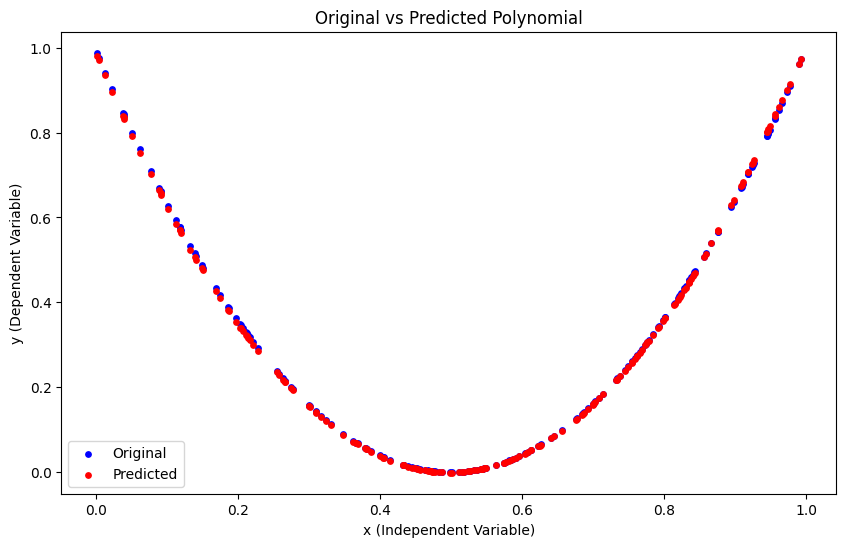

In [29]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

def main():
    # Build model
    model = build_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

    # Prepare data
    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()

    # Train model with early stopping
    history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=1000)

    # Evaluate model
    test_loss = model.evaluate(testX, testY)
    print(f"Test Loss (MSE): {test_loss}")

    # Calculate loss percentage (MAPE)
    y_pred = model.predict(testX)
    mape = np.mean(np.abs((testY - y_pred) / testY)) * 100
    print(f"Test Loss Percentage (MAPE): {mape:.2f}%")

    # Plot original vs predicted
    plt.figure(figsize=(10,6))
    plt.scatter(testX, testY, label="Original", color='blue', s=15)
    plt.scatter(testX, y_pred, label="Predicted", color='red', s=15)
    plt.title("Original vs Predicted Polynomial")
    plt.xlabel("x (Independent Variable)")
    plt.ylabel("y (Dependent Variable)")
    plt.legend()
    plt.show()

def prepare_train_val_test():
    x, y = data_process()

    # Shuffle data
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]

    # Reshape for scaler
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Normalize to [0, 1]
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y)

    # Split into train, val, test
    total_n = len(x)
    train_n = int(total_n * 0.7)
    val_n = int(total_n * 0.1)

    trainX = x[: train_n]
    trainY = y[: train_n]
    valX = x[train_n : train_n + val_n]
    valY = y[train_n : train_n + val_n]
    testX = x[train_n + val_n :]
    testY = y[train_n + val_n :]

    return (trainX, trainY), (valX, valY), (testX, testY)

def data_process():
    n = 1000
    y = []
    # Include negative values by taking range from -n//2 to n//2
    x = np.random.randint(-n//2, n//2, n)
    for i in range(n):
        y.append(my_polynomial(x[i]))
    y = np.array(y)
    x = np.array(x)
    return x, y

def my_polynomial(x):
    y = 5 * x**2 + 10 * x + 5
    return y

def build_model():
    inputs = Input((1,))
    h1 = Dense(128, activation='relu')(inputs)
    h2 = Dense(120, activation='relu')(h1)
    h3 = Dense(100, activation='relu')(h2)
    outputs = Dense(1,)(h3)

    model = Model(inputs, outputs)
    model.summary()
    return model

if __name__ == "__main__":
    main()
